In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


2023-12-13 10:18:49,492 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - mmdet.version=2.25.0
2023-12-13 10:18:49,492 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - 11.7
2023-12-13 10:18:49,493 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - GCC 9.4


1.12.0a0+8a1a93a True


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Wed Dec 13 10:18:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   39C    P8     9W / 250W |    317MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [10]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [11]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [12]:
# pip install mmcv-full

# Run whole video processing

In [26]:
patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
patch = "*/Einzel.MOV"
patch = "*/*test_4.mp4"
patch = "*/*micro_01*.mp4"

img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(patch))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20231213-130417_pigleg_test_micro_01_9971629157f418bd25d71c4135b9e9abdf4117e4/pigleg_test_micro_01.mp4')

# Do it per partes

In [33]:
outputdir = "./del_test_video_output/"
# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=True)
# qr_data = dcv.get_parameters_for_crop_rotate_rescale()
# plt.imshow(dcv.frame)
dcv._make_sure_media_is_cropped()
dcv.run_image_processing()
dcv._run_tracking()
# dcv._make_report()
# dcv._save_results()

2023-12-13 14:22:29.903 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 83
2023-12-13 14:22:30.772 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:221 - device=cuda
2023-12-13 14:22:31.012 | DEBUG    | run_qr:get_bboxes:37 - [[          0           0      1073.4      1170.5     0.13777]
 [     79.345      47.482       901.2      724.78    0.076695]
 [          0      1030.3      1059.8      1913.8    0.064781]]
2023-12-13 14:22:31.176 | DEBUG    | run_qr:bbox_info_extraction_from_frame:148 - {'bbox_scene_area': None,
 'box': [],
 'incision_bboxes': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.4724144766551353e-05,
 'qr_bboxes_SFD': [],
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}
2023-12-13 14:22:31,179 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-12-13 

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-13 14:22:31,711 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-13 14:22:31.713 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:232 - {'bbox_scene_area': None,
 'box': [],
 'incision_bboxes': [],
 'incision_bboxes_old': [[0.0,
                          168.2610321044922,
                          1076.070068359375,
                          778.1771240234375,
                          0.05007727071642876]],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.4724144766551353e-05,
 'qr_bboxes_SFD': [],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}
2023-12-13 14:22:31.715 | DEBUG    | pigleg_cv:_make_sure_media_is_cropped:107 - Single frame processing on original mediafile finished in 1.8140182495117188s.
2023-12-13 14:22:31.716 | DEBUG  

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-13 14:22:33,961 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-13 14:22:33.963 | DEBUG    | run_perpendicular:main_perpendicular:294 - len(imgs)=0
2023-12-13 14:22:33.964 | DEBUG    | pigleg_cv:run_image_processing:129 - Perpendicular finished.
2023-12-13 14:22:35,235 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-13 14:22:35,260 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-13 14:22:35,260 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-13 14:22:35,261 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdete

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-12-13 14:22:37,599 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-13 14:22:37,622 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-13 14:22:37,623 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-13 14:22:37,623 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-13 14:22:37,843 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth


2023-12-13 14:22:38.751 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 0 by tracker


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2023-12-13 14:22:38.885 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:60 - j=0, result={'det_bboxes': [array([[     465.51,      298.67,      521.86,      355.51,    0.087648],
       [     582.18,     -24.788,      634.64,      28.077,    0.036267],
       [     586.92,      -20.42,      630.37,      23.375,     0.03296],
       [      460.3,      293.71,      528.04,      362.21,    0.021628],
       [     472.68,      305.34,      515.38,      348.45,    0.018631]], dtype=float32), array([[     460.38,      333.96,      517.64,       392.2,    0.032267],
       [     468.89,      337.51,       512.3,      381.29,    0.018231]], dtype=float32), array([[     582.24,     -28.509,      636.66,      26.452,    0.013153]], dtype=float32)], 'track_bboxes': [array([], shape=(0, 6), dtype=float32), array([], shape=(0, 6), dtype=float32), array([], shape=(0, 6), dtype=float32)]}
2023-12-13 14:22:39.013 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:60 - j=1, result={'de

2023-12-13 14:28:00.737 | DEBUG    | run_report:main_report:675 - size_input_video: [720, 404], size_output_video: [1303, 420], size_output_img: [748, 420], resize_factor: 1.0396039603960396
2023-12-13 14:28:00.739 | DEBUG    | run_report:main_report:694 - Sort data N=
2023-12-13 14:28:00.740 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output/tracks_points.json'
2023-12-13 14:28:00.741 | DEBUG    | tools:save_json:26 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3']
2023-12-13 14:28:00.811 | DEBUG    | run_report:create_video_report_figure:542 - main_video_report: OK
2023-12-13 14:28:00.853 | DEBUG    | run_report:main_report:759 - Frame 0 processed!
2023-12-13 14:28:01.649 | DEBUG    | run_report:main_report:759 - Frame 10 processed!
2023-12-13 14:28:02.427 | DEBUG    | run_report:main_report:759 - Frame 20 processed!
2023-12-13 14:28:03.202 | DEBUG    | run_report:main_report:759 - Frame 30 processed!
2023-12-13 14:28:03.9

main_report: Video file del_test_video_output/__cropped.mp4 is processed!


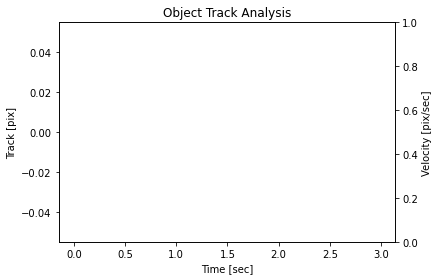

In [34]:
dcv._make_report()
dcv._save_results()

### Check the parameters for rotate and crop

2023-10-25 09:05:22.327 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 1672
2023-10-25 09:05:22.863 | DEBUG    | run_qr:get_bboxes:37 - [[          0           0      1063.3      1326.7     0.13618]
 [          0      790.14      1059.4        1920    0.098914]
 [      111.5      1085.8      919.27      1770.7    0.062531]
 [     150.39      187.66      982.93      900.72    0.050687]]
2023-10-25 09:05:23.137 | DEBUG    | run_qr:bbox_info_extraction_from_frame:135 - {'bbox_scene_area': [7.598320484161377,
                     0.4476509690284729,
                     1076.2008056640625,
                     1158.05126953125,
                     0.3550494313240051],
 'box': [],
 'incision_bboxes': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}
2023-10-25 09:05:23,

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-10-25 09:05:23,686 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-10-25 09:05:23.688 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:164 - {'bbox_scene_area': [7.598320484161377,
                     0.4476509690284729,
                     1076.2008056640625,
                     1158.05126953125,
                     0.3550494313240051],
 'box': [],
 'incision_bboxes': [],
 'incision_bboxes_old': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}


{'pix_size_method': 'video size estimation',
 'is_detected': False,
 'box': [],
 'pix_size': 1.0,
 'incision_bboxes': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None,
 'pix_size_single_frame_detector_m': 2.326684652934122e-05,
 'bbox_scene_area': [7.598320484161377,
  0.4476509690284729,
  1076.2008056640625,
  1158.05126953125,
  0.3550494313240051],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'incision_bboxes_old': []}

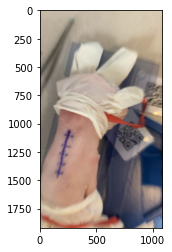

In [149]:

qr_data = dcv.get_parameters_for_crop_rotate_rescale()
plt.imshow(dcv.frame[:,:,::-1])
qr_data

2023-10-25 09:05:26.636 | DEBUG    | pigleg_cv:do_crop_rotate_rescale:187 - self.filename_cropped=del_test_video_output/__cropped.mp4
2023-10-25 09:05:26.638 | DEBUG    | pigleg_cv:do_crop_rotate_rescale:220 - filename=../piglegsurgeryweb/media/upload/20231011-075812_Einzel_d56d4c9ead2d476aeb8fb22ad1a16074764431c5/Einzel.MOV, True
2023-10-25 09:05:26.640 | DEBUG    | pigleg_cv:do_crop_rotate_rescale:225 - ffmpeg -i ../piglegsurgeryweb/media/upload/20231011-075812_Einzel_d56d4c9ead2d476aeb8fb22ad1a16074764431c5/Einzel.MOV -t 3 -filter:v transpose=1,scale=720:trunc(ow/a/2)*2 -an -y -b:v 1000k del_test_video_output/__cropped.mp4
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=r

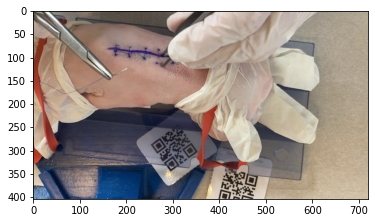

In [150]:

fn = dcv.do_crop_rotate_rescale(qr_data["bbox_scene_area"], qr_data["incision_bboxes"])
img = pigleg_cv.get_frame_to_process(fn)
plt.imshow(img[:,:,::-1])

# Do whole processing together


2023-12-13 13:11:46.136 | INFO     | pigleg_cv:run:87 - CV processing started on ../piglegsurgeryweb/media/upload/20231213-130417_pigleg_test_micro_01_9971629157f418bd25d71c4135b9e9abdf4117e4/pigleg_test_micro_01.mp4, outputdir=del_test_video_output
2023-12-13 13:11:46.138 | DEBUG    | pigleg_cv:run_video_processing:141 - Running video processing...
2023-12-13 13:11:46.142 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 83
2023-12-13 13:11:47.384 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:217 - device=cuda
2023-12-13 13:11:47.707 | DEBUG    | run_qr:get_bboxes:37 - [[          0           0      1073.4      1170.5     0.13777]
 [     79.345      47.482       901.2      724.78    0.076695]
 [          0      1030.3      1059.8      1913.8    0.064781]]
2023-12-13 13:11:47.935 | DEBUG    | run_qr:bbox_info_extraction_from_frame:148 - {'bbox_scene_area': None,
 'box': [],
 'incision_bboxes': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'vid

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-13 13:11:48,711 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-13 13:11:48.714 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:228 - {'bbox_scene_area': None,
 'box': [],
 'incision_bboxes': [],
 'incision_bboxes_old': [[0.0,
                          168.2610321044922,
                          1076.070068359375,
                          778.1771240234375,
                          0.05007727071642876]],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 2.4724144766551353e-05,
 'qr_bboxes_SFD': [],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0002777777777777778,
 'text': None}
2023-12-13 13:11:48.715 | DEBUG    | pigleg_cv:_make_sure_media_is_cropped:106 - Single frame processing on original mediafile finished in 2.5763983726501465s.
2023-12-13 13:11:48.716 | DEBUG  

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-13 13:11:52,054 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-13 13:11:52.056 | DEBUG    | run_perpendicular:main_perpendicular:294 - len(imgs)=0
2023-12-13 13:11:52.057 | DEBUG    | pigleg_cv:run_image_processing:128 - Perpendicular finished.
2023-12-13 13:11:52.058 | DEBUG    | pigleg_cv:run_video_processing:157 - Single frame processing on cropped mediafile finished in 1.2510428428649902s.
2023-12-13 13:11:52.059 | DEBUG    | pigleg_cv:run_video_processing:159 - Image processing finished in 1.2519419193267822s.
2023-12-13 13:11:53,689 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-13 13:11:53,723 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-13 13:11:

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_microsurgery/epoch_15.pth


2023-12-13 13:11:56.625 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 0 by tracker


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2023-12-13 13:11:56.774 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:60 - j=0, result={'det_bboxes': [array([[     355.35,     -166.72,      596.67,      72.908,    0.084215],
       [     337.06,      45.401,      577.91,      287.03,    0.019837],
       [     350.67,      63.905,      549.81,       264.7,    0.017144]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([[      385.5,      76.609,      555.85,      248.23,    0.047449],
       [     414.28,      80.291,      559.86,      227.03,    0.043408],
       [     394.59,      239.52,      648.93,      495.73,    0.025478],
       [     353.01,      56.759,      567.09,      271.81,    0.024012],
       [     378.29,      276.36,      663.19,       565.3,    0.019721],
       [     461.38,      89.785,      574.38,      203.91,    0.011566]], dtype=float32), array([[     428.36,      80.015,      548.53,      201.12,    0.050965],
       [     472.44,      15.967,      597.24,      141.72,    0.011514

g Scissors
m None


2023-12-13 13:12:49.099 | DEBUG    | run_report:main_report:759 - Frame 10 processed!
2023-12-13 13:12:50.238 | DEBUG    | run_report:main_report:759 - Frame 20 processed!
2023-12-13 13:12:51.435 | DEBUG    | run_report:main_report:759 - Frame 30 processed!
2023-12-13 13:12:52.620 | DEBUG    | run_report:main_report:759 - Frame 40 processed!
2023-12-13 13:12:53.859 | DEBUG    | run_report:main_report:759 - Frame 50 processed!
2023-12-13 13:12:54.853 | DEBUG    | run_report:main_report:759 - Frame 60 processed!
2023-12-13 13:12:55.968 | DEBUG    | run_report:main_report:759 - Frame 70 processed!
2023-12-13 13:12:56.905 | DEBUG    | run_report:main_report:759 - Frame 80 processed!
2023-12-13 13:12:57.789 | DEBUG    | run_report:main_report:759 - Frame 90 processed!
2023-12-13 13:12:58.699 | DEBUG    | run_report:main_report:759 - Frame 100 processed!
2023-12-13 13:12:59.691 | DEBUG    | run_report:main_report:759 - Frame 110 processed!
2023-12-13 13:13:00.656 | DEBUG    | run_report:main

main_report: Video file del_test_video_output/__cropped.mp4 is processed!


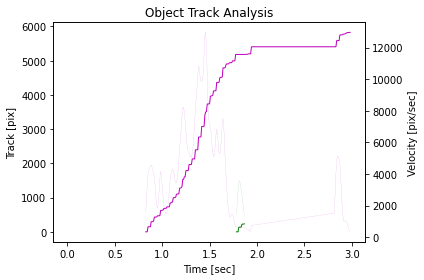

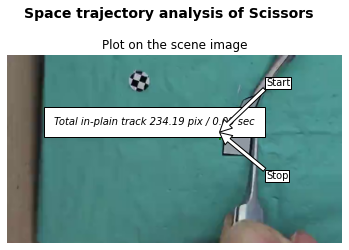

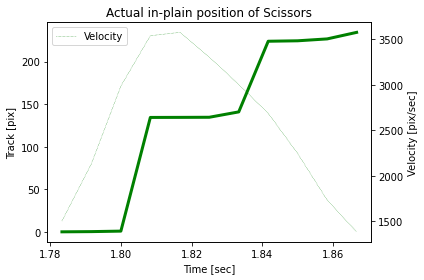

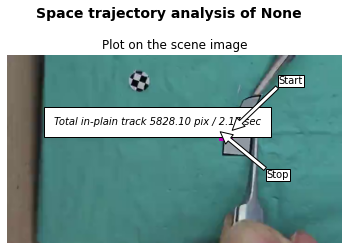

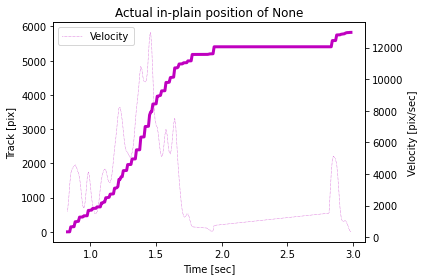

In [28]:
outputdir = "./del_test_video_output/"
# pigleg_cv.do_computer_vision(img_pths[0], outputdir , meta=None)
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=True,is_microsurgery=True )
# qr_data = dcv.get_parameters_for_crop_rotate_rescale()
# plt.imshow(dcv.frame)
# qr_data
dcv.run()

2023-12-13 13:34:14.211 | DEBUG    | run_report:main_report:675 - size_input_video: [720, 404], size_output_video: [1303, 420], size_output_img: [748, 420], resize_factor: 1.0396039603960396
2023-12-13 13:34:14.218 | DEBUG    | run_report:main_report:694 - Sort data N=
/webapps/piglegsurgery/piglegcv/run_report.py:726: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  frame_ids_list = np.asarray(frame_ids).tolist()
2023-12-13 13:34:14.222 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output/tracks_points.json'
2023-12-13 13:34:14.223 | DEBUG    | tools:save_json:26 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3']
2023-12-13 13:34:14.285 | DEBUG    | run_report:create_video_report_figure:542 - main_video_report: 

g Scissors
m None


2023-12-13 13:34:15.118 | DEBUG    | run_report:main_report:759 - Frame 10 processed!
2023-12-13 13:34:15.917 | DEBUG    | run_report:main_report:759 - Frame 20 processed!
2023-12-13 13:34:16.702 | DEBUG    | run_report:main_report:759 - Frame 30 processed!
2023-12-13 13:34:17.480 | DEBUG    | run_report:main_report:759 - Frame 40 processed!
2023-12-13 13:34:18.316 | DEBUG    | run_report:main_report:759 - Frame 50 processed!
2023-12-13 13:34:19.110 | DEBUG    | run_report:main_report:759 - Frame 60 processed!
2023-12-13 13:34:19.902 | DEBUG    | run_report:main_report:759 - Frame 70 processed!
2023-12-13 13:34:20.696 | DEBUG    | run_report:main_report:759 - Frame 80 processed!
2023-12-13 13:34:21.487 | DEBUG    | run_report:main_report:759 - Frame 90 processed!
2023-12-13 13:34:22.282 | DEBUG    | run_report:main_report:759 - Frame 100 processed!
2023-12-13 13:34:23.070 | DEBUG    | run_report:main_report:759 - Frame 110 processed!
2023-12-13 13:34:23.858 | DEBUG    | run_report:main

main_report: Video file del_test_video_output/__cropped.mp4 is processed!


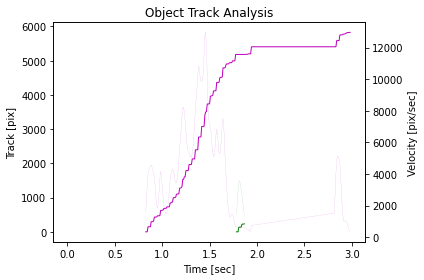

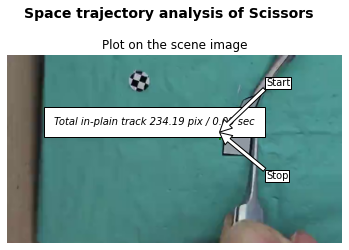

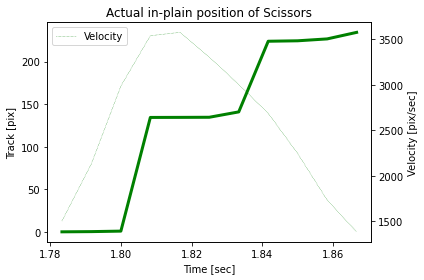

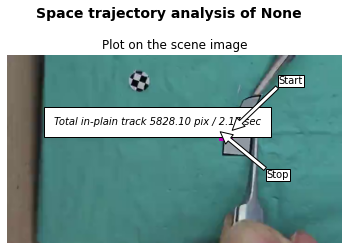

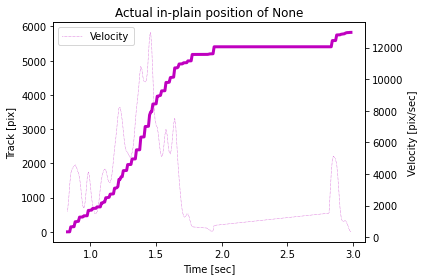

In [29]:
report_data = dcv.make_report()